# 바이러스

## 문제

* 신종 바이러스인 웜 바이러스는 네트워크를 통해 전파된다. 한 컴퓨터가 웜 바이러스에 걸리면 그 컴퓨터와 네트워크 상에서 연결되어 있는 모든 컴퓨터는 웜 바이러스에 걸리게 된다.

* 예를 들어 7대의 컴퓨터가 <그림 1>과 같이 네트워크 상에서 연결되어 있다고 하자. 1번 컴퓨터가 웜 바이러스에 걸리면 웜 바이러스는 2번과 5번 컴퓨터를 거쳐 3번과 6번 컴퓨터까지 전파되어 2, 3, 5, 6 네 대의 컴퓨터는 웜 바이러스에 걸리게 된다. 하지만 4번과 7번 컴퓨터는 1번 컴퓨터와 네트워크상에서 연결되어 있지 않기 때문에 영향을 받지 않는다.

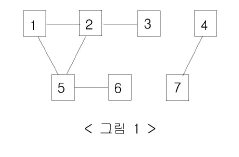

In [3]:
from IPython.display import Image
Image('../image/2606_바이러스.png')

* 어느 날 1번 컴퓨터가 웜 바이러스에 걸렸다. 컴퓨터의 수와 네트워크 상에서 서로 연결되어 있는 정보가 주어질 때, 1번 컴퓨터를 통해 웜 바이러스에 걸리게 되는 컴퓨터의 수를 출력하는 프로그램을 작성하시오.

## 입력

* 첫째 줄에는 컴퓨터의 수가 주어진다. 컴퓨터의 수는 100 이하인 양의 정수이고 각 컴퓨터에는 1번 부터 차례대로 번호가 매겨진다. 둘째 줄에는 네트워크 상에서 직접 연결되어 있는 컴퓨터 쌍의 수가 주어진다. 이어서 그 수만큼 한 줄에 한 쌍씩 네트워크 상에서 직접 연결되어 있는 컴퓨터의 번호 쌍이 주어진다.

## 출력

* 1번 컴퓨터가 웜 바이러스에 걸렸을 때, 1번 컴퓨터를 통해 웜 바이러스에 걸리게 되는 컴퓨터의 수를 첫째 줄에 출력한다.

## Code

In [4]:
# 2606_바이러스(깊이 우선 탐색 DFS)
import sys
from collections import deque

def find_infected_dfs(computer, practice_args):
    N, M, graph, v_infected = practice_args

    v_infected[computer] = True
    for i in range(1, N+1):
        # not v_infected[i]가 없으면 find_infected_dfs가 계속해서 실행되므로 무한번 반복한다.
        if (not v_infected[i]) and (graph[computer][i] == 1):
            find_infected_dfs(i, practice_args)
    return sum(v_infected)-1

def solution():
    N = int(input())
    M = int(input())
    graph =  [[0]*(N+1) for _ in range(N+1)]
    v_infected = [False]*(N+1) 
    practice_args = (N, M, graph, v_infected)

    for i in range(M):
        x, y = map(int, input().split())
        # x, y = map(int, sys.stdin.readline().split())
        graph[x][y] = 1
        graph[y][x] = 1

    print(find_infected_dfs(1, practice_args))


In [ ]:
# 2606_바이러스(너비 우선 탐색 BFS)
import sys
from collections import deque

# N = int(sys.stdin.readline().rstrip())
# M = int(sys.stdin.readline().rstrip())
N = int(input())
M = int(input())
graph =  [[0]*(N+1) for _ in range(N+1)]
v_infected = [False]*(N+1) 
practice_args = (N, M, graph, v_infected)

def find_infected_bfs(computer, practice_args):
    N, M, graph, v_infected = practice_args
    queue = deque()
    queue.append(computer)
    while queue:
        c_point = queue.popleft()
        for i in range(N+1):
            if (not v_infected[i]) and graph[c_point][i] == 1:
                v_infected[i] = True
                queue.append(i)
    return sum(v_infected) - 1

for i in range(M):
    x, y = map(int, input().split())
    # x, y = map(int, sys.stdin.readline().split())
    graph[x][y] = 1
    graph[y][x] = 1

print(find_infected_bfs(1, practice_args))

## 예제입력

In [5]:
solution()

4


## Note

# DFS

* 탐색 여부를 저장하는 List(v_infected)를 만든다. 탐색 여부를 저장하지 않으면 재귀함수가 무한대로 반복하게 된다.
* for문을 사용해서 2차원 List에 컴퓨터들의 연결 상태를 저장한다. 
* ex. graph[1][2] == graph[2][1]이면 2번 컴퓨터와 1번 컴퓨터가 연결되어 있다는 뜻이다.
* 컴퓨터가 연결 된 순서대로 탐색 여부를 False에서 True로 변환한다. 더 이상 연결된 컴퓨터가 없으면 함수가 순서대로 종료되고 for문으로 돌아온다.
* 탐색한 컴퓨터의 대수-1를 정답으로 반환한다.


# BFS

* 탐색 여부를 저장하는 List(v_infected)를 만들어, 한번 탐색했던 컴퓨터는 탐색하지 않도록 한다.
* queue에 맨 처음 컴퓨터(1)을 넣고, 해당 컴퓨터와 연결된 모든 컴퓨터를 queue에 추가하면서 해당 컴퓨터의 탐색 여부(v_infected)를 True로 바꾼다.
* for문을 사용해서 2차원 List에 컴퓨터들의 연결 상태를 저장한다. 
* ex. graph[1][2] == graph[2][1]이면 2번 컴퓨터와 1번 컴퓨터가 연결되어 있다는 뜻이다.
* 더 이상 탐색할 컴퓨터가 없으면 queue에는 아무것도 없게 되므로 while문이 종료된다.

https://www.acmicpc.net/problem/2606